Modeling Notebook:

# Loading Packages

In [12]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Loading Data

In [13]:
# Define the path to your CSV file
# file_path = r"C:/Users/johne/Downloads/IWC_Work_Orders_Extract.csv"
file_path = r"C:/Users/matt/Downloads/IWC_Work_Orders_Extract.csv"
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

C:\Users\matt\AppData\Local\Temp\ipykernel_13316\608475065.py:5: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


# Glypse of Data

In [6]:
# Display the first 5 rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())

Head of the DataFrame:
    ORDER_ID PLANT_ID PRODUCTION_LOCATION EXECUTION_START_DATE  \
0  705642457     G812                ROMA           2024-05-04   
1  704191697     G812                ROMA           2022-09-13   
2  704466547     G812                ROMA           2022-12-21   
3  703834477     G812                ROMA           2022-07-04   
4  704661125     G291               MONZA           2023-03-15   

  EXECUTION_FINISH_DATE ACTUAL_START_TIME ACTUAL_FINISH_TIME  \
0            2024-05-12      06:00:00.000       23:04:08.000   
1            2022-09-13      06:00:00.000       17:17:24.000   
2            2022-12-21      07:00:00.000       07:00:00.000   
3            2022-07-04      06:00:00.000       06:00:00.000   
4            2023-03-15      07:00:00.000       07:00:00.000   

   ACTUAL_WORK_IN_MINUTES MAINTENANCE_PLAN  MAINTENANCE_ITEM  ...  \
0                   390.0              NaN               NaN  ...   
1                   420.0              NaN               

# Creating new variables:

# Model

C:\Users\matt\AppData\Local\Temp\ipykernel_13852\1941442256.py:20: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Initial DataFrame size: (1427264, 25)
DataFrame size after data manipulation: (630903, 20)


C:\Users\matt\AppData\Local\Temp\ipykernel_13852\1941442256.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
C:\Users\matt\AppData\Local\Temp\ipykernel_13852\1941442256.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
C:\Users\matt\AppData\Local\Temp\ipykernel_13852\1941442256.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Feature Importance for ACTUAL_WORK_IN_MINUTES:
FUNCTIONAL_AREA_NODE_1_MODIFIED    1.756545e+01
MAINTENANCE_PLAN                   1.285744e+01
FUNCTIONAL_LOC                     1.016232e+01
ORDER_ID                           9.870617e+00
MAINTENANCE_ACTIVITY_TYPE          8.061616e+00
FUNCTIONAL_AREA_NODE_4_MODIFIED    2.856117e+00
EQUIP_CAT_DESC                     2.154953e+00
EQUIPMENT_DESC                     1.710880e+00
FUNCTIONAL_AREA_NODE_2_MODIFIED    1.653741e+00
EQUIPMENT_ID                       5.387576e-02
EQUIP_VALID_TO                     1.297420e-15
FUNCTIONAL_AREA_NODE_3_MODIFIED    0.000000e+00
FUNCTIONAL_AREA_NODE_5_MODIFIED    0.000000e+00
MAINTENANCE_ITEM                   0.000000e+00
EQUIP_VALID_FROM                   0.000000e+00
MAINTENANCE_TYPE_DESCRIPTION       0.000000e+00
EQUIP_START_UP_DATE                0.000000e+00
PRODUCTION_LOCATION                0.000000e+00
dtype: float64


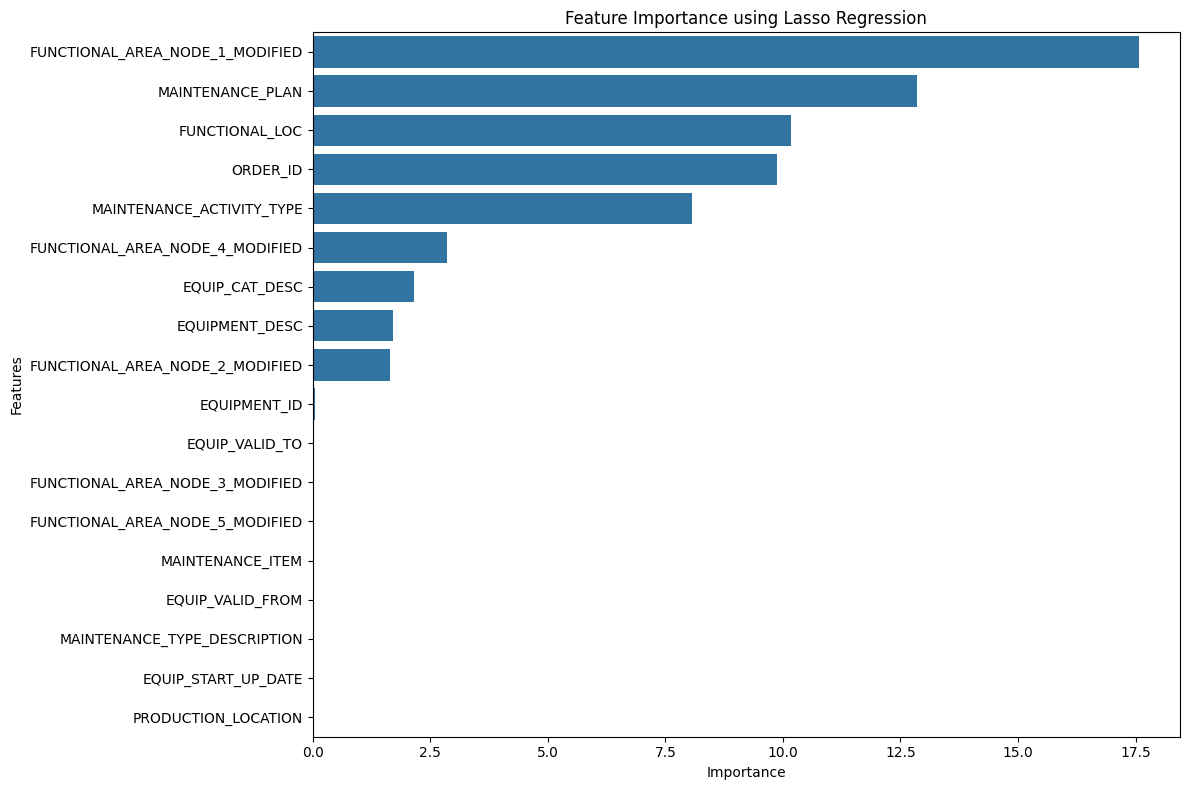

Head of the DataFrame:
          ORDER_ID PRODUCTION_LOCATION EXECUTION_START_DATE  \
1061196  700262188         SILVERSTONE           2017-11-21   
841170   700604795         SILVERSTONE           2018-05-18   
1333485  700607492         SILVERSTONE           2018-05-20   
402698   700609289         SILVERSTONE           2018-05-21   
446071   700633497         SILVERSTONE           2018-05-31   

         ACTUAL_WORK_IN_MINUTES MAINTENANCE_PLAN  MAINTENANCE_ITEM  \
1061196                   150.0              NaN               NaN   
841170                     90.0              NaN               NaN   
1333485                   180.0              NaN               NaN   
402698                    165.0              NaN               NaN   
446071                    150.0              NaN               NaN   

        MAINTENANCE_ACTIVITY_TYPE  MAINTENANCE_TYPE_DESCRIPTION  \
1061196                 Unplanned  Corrective Maintenance Order   
841170                  Unplanned  Correcti

In [13]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Loading Packages Section (Jupyter Notebook Style)
import pandas as pd

# Data Loading Section
# Define the path to your CSV file
# file_path = r"C:/Users/johne/Downloads/IWC_Work_Orders_Extract.csv"
file_path = r"C:/Users/matt/Downloads/IWC_Work_Orders_Extract.csv"
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Print the size of the DataFrame before any data manipulation
print(f"Initial DataFrame size: {df.shape}")

# Filter data for the Silverstone production plant
if 'PRODUCTION_LOCATION' in df.columns:
    df = df[df['PRODUCTION_LOCATION'] == 'SILVERSTONE']

# Check if the filtered DataFrame is empty
if df.empty:
    raise ValueError("No data available for the Silverstone production plant. Please check the dataset.")

# Data Preprocessing Section
# Convert 'EXECUTION_START_DATE' to datetime format
df['EXECUTION_START_DATE'] = pd.to_datetime(df['EXECUTION_START_DATE'], errors='coerce')

# Sort the DataFrame by 'EQUIPMENT_ID' and 'EXECUTION_START_DATE'
df.sort_values(by=['EQUIPMENT_ID', 'EXECUTION_START_DATE'], inplace=True)

# Remove 'ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME', 'PLANT_ID', 'ORDER_DESCRIPTION', 'EXECUTION_FINISH_DATE' columns
df = df.drop(columns=['ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME', 'PLANT_ID', 'ORDER_DESCRIPTION', 'EXECUTION_FINISH_DATE'], errors='ignore')

# Print the size of the DataFrame after data manipulation
print(f"DataFrame size after data manipulation: {df.shape}")

# Selecting features for feature importance analysis
features = df.columns.difference(['ACTUAL_WORK_IN_MINUTES', 'EXECUTION_START_DATE'])
X = df[features]
y = df['ACTUAL_WORK_IN_MINUTES']

# Handling categorical features efficiently
# Convert categorical columns to category dtype to reduce memory usage
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    X[col] = X[col].astype('category')

# Encoding categorical features using target encoding to reduce memory usage
from category_encoders import TargetEncoder
encoder = TargetEncoder(cols=categorical_cols)
X = encoder.fit_transform(X, y)

# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Splitting the data into training and testing sets
if len(X) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("No samples available for training and testing after filtering. Please adjust filtering criteria.")

# Scaling Features Section
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

# Training a Lasso Model to Identify Important Features
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Feature Importance Analysis
feature_importance = pd.Series(np.abs(lasso_model.coef_), index=X_train.select_dtypes(include=[np.number]).columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Display Feature Importance
print("Feature Importance for ACTUAL_WORK_IN_MINUTES:")
print(feature_importance)

# Plotting Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance using Lasso Regression')
plt.tight_layout()
plt.show()

# Glypse of Data Section
# Display the first 5 rows of the DataFrame
print("Head of the DataFrame:")
print(df.head())
